In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from plotly import graph_objs as go
from sklearn.metrics import classification_report, plot_confusion_matrix
import random
import numpy as np
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
from plotly import graph_objs as go

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
path = "/gdrive/My Drive/Big Data Analytics 6893/Kaggle 60K Question Quality Dataset"

train = pd.read_csv(os.path.join(path, 'train.csv'))
val = pd.read_csv(os.path.join(path, 'valid.csv'))

data = pd.concat((train, val))

In [4]:
print(f'The size of train: {len(train)} samples')
print(f'The size of val: {len(val)} samples')
print(f'The combined size: {len(data)} samples')

The size of train: 45000 samples
The size of val: 15000 samples
The combined size: 60000 samples


In [6]:
data = data.reset_index() # fix the indexing after the concat 

In [7]:
data.head()

,index,Id,Title,Body,Tags,CreationDate,Y
0,0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [22]:
data['body_scraped']=data['Body'].apply(lambda x: BeautifulSoup(x, 'html.parser').text)

In [10]:
data.head()

,index,Id,Title,Body,Tags,CreationDate,Y,body_scraped
0,0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,I'm already familiar with repeating tasks ever...
1,1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,I'd like to understand why Java 8 Optionals we...
2,2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,I am attempting to overlay a title over an ima...
3,3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"The question is very simple, but I just could ..."
4,4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,I'm using custom floatingactionmenu. I need to...


In [11]:
data.Body[0]

'<p>I\'m already familiar with repeating tasks every n seconds by using Java.util.Timer and Java.util.TimerTask. But lets say I want to print "Hello World" to the console every random seconds from 1-5. Unfortunately I\'m in a bit of a rush and don\'t have any code to show so far. Any help would be apriciated.  </p>\n'

In [12]:
len(data[data['Y']=='HQ']['body_scraped'].to_list()[0])

106

In [13]:
list_HQ = data[data['Y']=='HQ']['body_scraped'].to_list()
list_LQ_EDIT = data[data['Y']=='LQ_EDIT']['body_scraped'].to_list()
list_LQ_CLOSE = data[data['Y']=='LQ_CLOSE']['body_scraped'].to_list()

In [14]:
len_list_HQ = []
len_list_LQ_EDIT = []
len_list_LQ_CLOSE = []

for i in list_HQ:
  len_list_HQ.append(len(i))

for i in list_LQ_EDIT:
  len_list_LQ_EDIT.append(len(i))

for i in list_LQ_CLOSE:
  len_list_LQ_CLOSE.append(len(i))

In [15]:
pd.Series(len_list_HQ).describe()

count    20000.000000
mean       976.994250
std       1340.827199
min         31.000000
25%        364.000000
50%        628.000000
75%       1115.000000
max      29114.000000
dtype: float64

We can see that for HQ questions, the mean length for the body of the question is 976.994250 words 



In [16]:
pd.Series(len_list_LQ_EDIT).describe()

count    20000.000000
mean       935.106950
std       1527.821578
min          9.000000
25%        291.000000
50%        521.000000
75%        969.000000
max      29363.000000
dtype: float64

In [17]:
pd.Series(len_list_LQ_CLOSE).describe()

count    20000.000000
mean       707.431400
std       1324.570587
min         37.000000
25%        224.000000
50%        390.000000
75%        710.000000
max      28853.000000
dtype: float64

(array([4.019e+03, 5.729e+03, 3.584e+03, 2.155e+03, 1.329e+03, 8.680e+02,
        5.460e+02, 3.920e+02, 2.770e+02, 2.260e+02, 1.540e+02, 1.220e+02,
        8.900e+01, 6.000e+01, 6.700e+01, 5.700e+01, 3.200e+01, 4.200e+01,
        2.900e+01, 1.900e+01, 1.400e+01, 1.600e+01, 1.400e+01, 1.100e+01,
        1.000e+01, 1.200e+01, 7.000e+00, 8.000e+00, 7.000e+00, 8.000e+00,
        7.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 5.000e+00,
        5.000e+00, 2.000e+00, 9.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 5.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+0

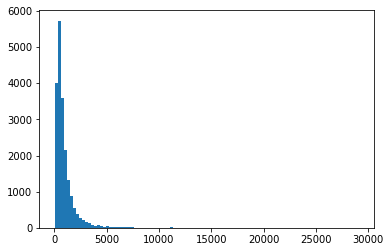

In [18]:
plt.hist(len_list_HQ, bins=100)

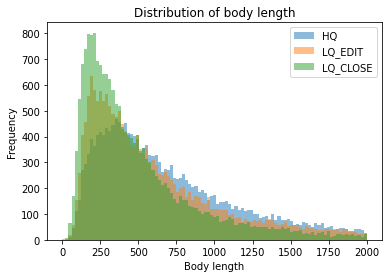

In [19]:
from matplotlib import pyplot
import numpy

bins = numpy.linspace(0, 2000, 100)

pyplot.hist(len_list_HQ, bins, alpha=0.5, label='HQ')
pyplot.hist(len_list_LQ_EDIT, bins, alpha=0.5, label='LQ_EDIT')
pyplot.hist(len_list_LQ_CLOSE, bins, alpha=0.5, label='LQ_CLOSE')

pyplot.title("Distribution of body length")
pyplot.xlabel("Body length")
pyplot.ylabel("Frequency")
pyplot.legend(loc='upper right')
pyplot.show()

So, looking at the length distribution, it looks like the most of the data is within 1000 words 

So my first try will be cutting the body at 1000 words limit 

In [20]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
val, test = train_test_split(test, test_size=0.5, random_state=42)

print(f'The size of train: {len(train)} samples')
print(f'The size of val: {len(val)} samples')
print(f'The size of test: {len(test)} samples')

The size of train: 48000 samples
The size of val: 6000 samples
The size of test: 6000 samples


In [21]:
data['Y'].values

array(['LQ_CLOSE', 'HQ', 'HQ', ..., 'LQ_EDIT', 'LQ_CLOSE', 'LQ_CLOSE'],
      dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(data['Y'].values) 

train_y = encoder.transform(train['Y'].values)
val_y = encoder.transform(val['Y'].values)
test_y = encoder.transform(test['Y'].values)

train_X = train['body_scraped'].values
val_X = val['body_scraped'].values
test_X = test['body_scraped'].values

train_y = np_utils.to_categorical(train_y)
val_y = np_utils.to_categorical(val_y)
test_y = np_utils.to_categorical(test_y)

In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

tokens = Tokenizer(num_words=100000, oov_token='') # i feel like vocab size of 100,000 is probably enough 
tokens.fit_on_texts(list(train_X))

In [25]:
train_X = tokens.texts_to_sequences(train_X)
val_X = tokens.texts_to_sequences(val_X)
test_X = tokens.texts_to_sequences(test_X)

In [26]:
# I decided to cap the length of the body to be 1000 based on histogram distribution, but can change this to either higher or lower 
train_X = preprocessing.sequence.pad_sequences(train_X, maxlen=1000, padding='post', truncating='post')
val_X = preprocessing.sequence.pad_sequences(val_X, maxlen=1000, padding='post', truncating='post')
test_X = preprocessing.sequence.pad_sequences(test_X, maxlen=1000, padding='post', truncating='post')

In [27]:
train_X.shape

(48000, 1000)

In [28]:
train_X

array([[  30,    4,  159, ...,    0,    0,    0],
       [  12,   19,   34, ...,    0,    0,    0],
       [  61,  552,   15, ...,    0,    0,    0],
       ...,
       [3920,  106,    5, ...,    0,    0,    0],
       [  61,    8,    3, ...,    0,    0,    0],
       [ 432, 2106,   18, ...,    0,    0,    0]], dtype=int32)

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, Embedding, Input, LSTM, Bidirectional, GlobalAveragePooling1D, BatchNormalization
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import regularizers


inputs = Input(shape=(None,), dtype="int32")

# input embedding layer 
x = Embedding(100000, 128)(inputs)

# 1st bi-LSTM layer
x = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(l=0.001)))(x)
# dropout and batch-normalization
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# 2nd bi-LSTM layer
x = Bidirectional(LSTM(64, kernel_regularizer=regularizers.l2(l=0.001)))(x)
# dropout and batch-normalization
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

flatten = Flatten()(x)

dense_end = Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))(flatten)
drop_end = Dropout(0.2)(dense_end)
batch_normalization_end = BatchNormalization()(drop_end)

outputs = Dense(3, activation="softmax")(batch_normalization_end)

model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(lr=1e-4), 
              metrics=['accuracy'],)

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         12800000  
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 batch_normalization (BatchN  (None, None, 128)        512       
 ormalization)                                                   
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              9881

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
my_callbacks = [tf.keras.callbacks.ModelCheckpoint('lstm.h5', monitor='val_loss', save_best_only=True, verbose=2),
                tf.keras.callbacks.EarlyStopping(monitor='val_loss',  patience=10, verbose=2),
                tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=2)]

lstm = model.fit(train_X, 
                train_y, 
                batch_size=32, 
                epochs=50, 
                validation_data=(val_X, val_y),
                callbacks = my_callbacks, 
                verbose=1)

Epoch 1/50
1500/1500 [==============================] - ETA: 0s - loss: 1.3791 - accuracy: 0.7023
Epoch 1: val_loss improved from inf to 0.95749, saving model to lstm.h5
1500/1500 [==============================] - 211s 137ms/step - loss: 1.3791 - accuracy: 0.7023 - val_loss: 0.9575 - val_accuracy: 0.8448 - lr: 1.0000e-04
Epoch 2/50
1500/1500 [==============================] - ETA: 0s - loss: 0.8911 - accuracy: 0.8548
Epoch 2: val_loss improved from 0.95749 to 0.80166, saving model to lstm.h5
1500/1500 [==============================] - 222s 148ms/step - loss: 0.8911 - accuracy: 0.8548 - val_loss: 0.8017 - val_accuracy: 0.8663 - lr: 1.0000e-04
Epoch 3/50
1500/1500 [==============================] - ETA: 0s - loss: 0.7045 - accuracy: 0.8900
Epoch 3: val_loss improved from 0.80166 to 0.71798, saving model to lstm.h5
1500/1500 [==============================] - 213s 142ms/step - loss: 0.7045 - accuracy: 0.8900 - val_loss: 0.7180 - val_accuracy: 0.8630 - lr: 1.0000e-04
Epoch 4/50
1500/1500

In [32]:
loss, accuracy = model.evaluate(test_X, test_y)

188/188 [==============================] - 13s 67ms/step - loss: 1.2060 - accuracy: 0.8313


In [35]:
pred_y = model.predict(test_X)

188/188 [==============================] - 13s 67ms/step


In [37]:
print(classification_report(np.argmax(test_y, axis=1), np.argmax(pred_y, axis=1), target_names=list(encoder.classes_)))

              precision    recall  f1-score   support

          HQ       0.81      0.79      0.80      2013
    LQ_CLOSE       0.75      0.78      0.76      1974
     LQ_EDIT       0.94      0.93      0.93      2013

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000

